# Can we predict whether a person will have diabetes based on their health status?
## Pima Indians Dataset

In [65]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import binarize
%matplotlib inline
import matplotlib.pyplot as plt

# read the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [66]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
# define X and y
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'pedigree', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [68]:
# split X and y into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
# train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [71]:
# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.807291666667


In [72]:
# Test out the Null accuracy (if you were to always predict the most frequent class)
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [73]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [74]:
# calculate the percentage of zeroes
1 - y_test.mean()

0.6770833333333333

In [75]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [76]:
# Confusion matrix: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 26  36]]


In [77]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [78]:
# classification accuracy: how often is this classifier correct?
print(metrics.accuracy_score(y_test, y_pred_class))

0.807291666667


In [79]:
# sensitivity: When value is positive, how often is the classifier correct?
# precision: When a positive value is predicted, how often is the prediction correct?
print('Sensitivity')
print(metrics.recall_score(y_test, y_pred_class))
print('Precision')
print(metrics.precision_score(y_test, y_pred_class))

Sensitivity
0.58064516129
Precision
0.765957446809


In [80]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [81]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.10465311,  0.89534689],
       [ 0.78657731,  0.21342269],
       [ 0.85907149,  0.14092851],
       [ 0.39700711,  0.60299289],
       [ 0.82789184,  0.17210816],
       [ 0.92381005,  0.07618995],
       [ 0.31023563,  0.68976437],
       [ 0.25125369,  0.74874631],
       [ 0.55803543,  0.44196457],
       [ 0.62406829,  0.37593171]])

In [82]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.89534689,  0.21342269,  0.14092851,  0.60299289,  0.17210816,
        0.07618995,  0.68976437,  0.74874631,  0.44196457,  0.37593171])

In [83]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

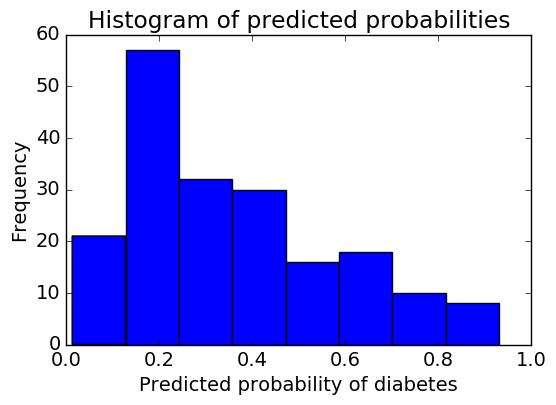

In [84]:
# Histogram of predicted probabilities
plt.rcParams['font.size'] = 14
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [85]:
# predict diabetes if the predicted probability is greater than 0.3
y_pred_class = binarize(y_pred_prob, 0.3)[0]

C:\Users\Infinity\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [86]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.89534689,  0.21342269,  0.14092851,  0.60299289,  0.17210816,
        0.07618995,  0.68976437,  0.74874631,  0.44196457,  0.37593171])

In [87]:
# print the first 10 predicted classes with the lower threshold 
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.])

In [88]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[119  11]
 [ 26  36]]


In [89]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[86 44]
 [ 8 54]]


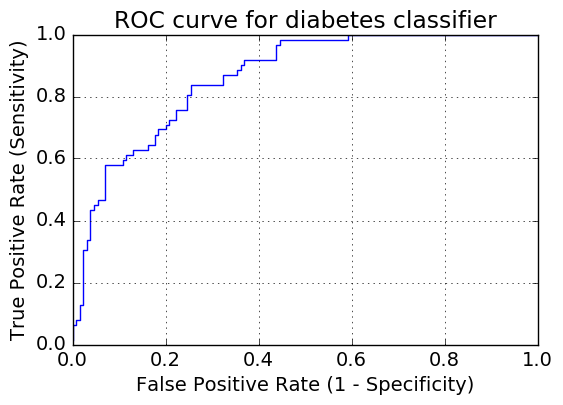

In [90]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [91]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [92]:
evaluate_threshold(0.5)

Sensitivity: 0.58064516129
Specificity: 0.930769230769


In [93]:
evaluate_threshold(0.3)

Sensitivity: 0.870967741935
Specificity: 0.676923076923


In [94]:
# Calculates AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.864143920596


In [95]:
# calculate cross-validated AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.82475498575498585